In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/data/'
code_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/'
well_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/data/wells/'
model_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/models/'
plot_dir = '/content/drive/My Drive/Fungal-Fungal-interaction/plots/'
data = pd.read_csv(data_dir + '01_well_data.csv')
raw_paths, lbls = data['img_paths'], data['labels']

In [ ]:
import joblib
import glob

perf_paths = glob.glob(code_dir+'*.joblib')
performance = {}
for path in perf_paths:
  a = joblib.load(path)
  print(path)
  print(a.keys())
  performance.update(a)

"""
performance.keys() -> vgg16, resnet50, mobnetv2, densenet121, vit
performance['vgg16'].keys() -> 0, 1, 2, 3, 4
performance['vgg16']['0']-> training process (list: train_loss, train_acc, val_loss, val_acc), true_pred_lbls (list), p_r_f (list), acc
"""

/content/drive/My Drive/Fungal-Fungal-interaction/performance.joblib
dict_keys(['vgg16', 'resnet50', 'mobnetv2', 'densenet121'])
/content/drive/My Drive/Fungal-Fungal-interaction/performanceViT.joblib
dict_keys(['vit'])


"\nperformance.keys() -> vgg16, resnet50, mobnetv2, densenet121, vit\nperformance['vgg16'].keys() -> 0, 1, 2, 3, 4\nperformance['vgg16']['0']-> training process (list: train_loss, train_acc, val_loss, val_acc), true_pred_lbls (list), p_r_f (list), acc\n"

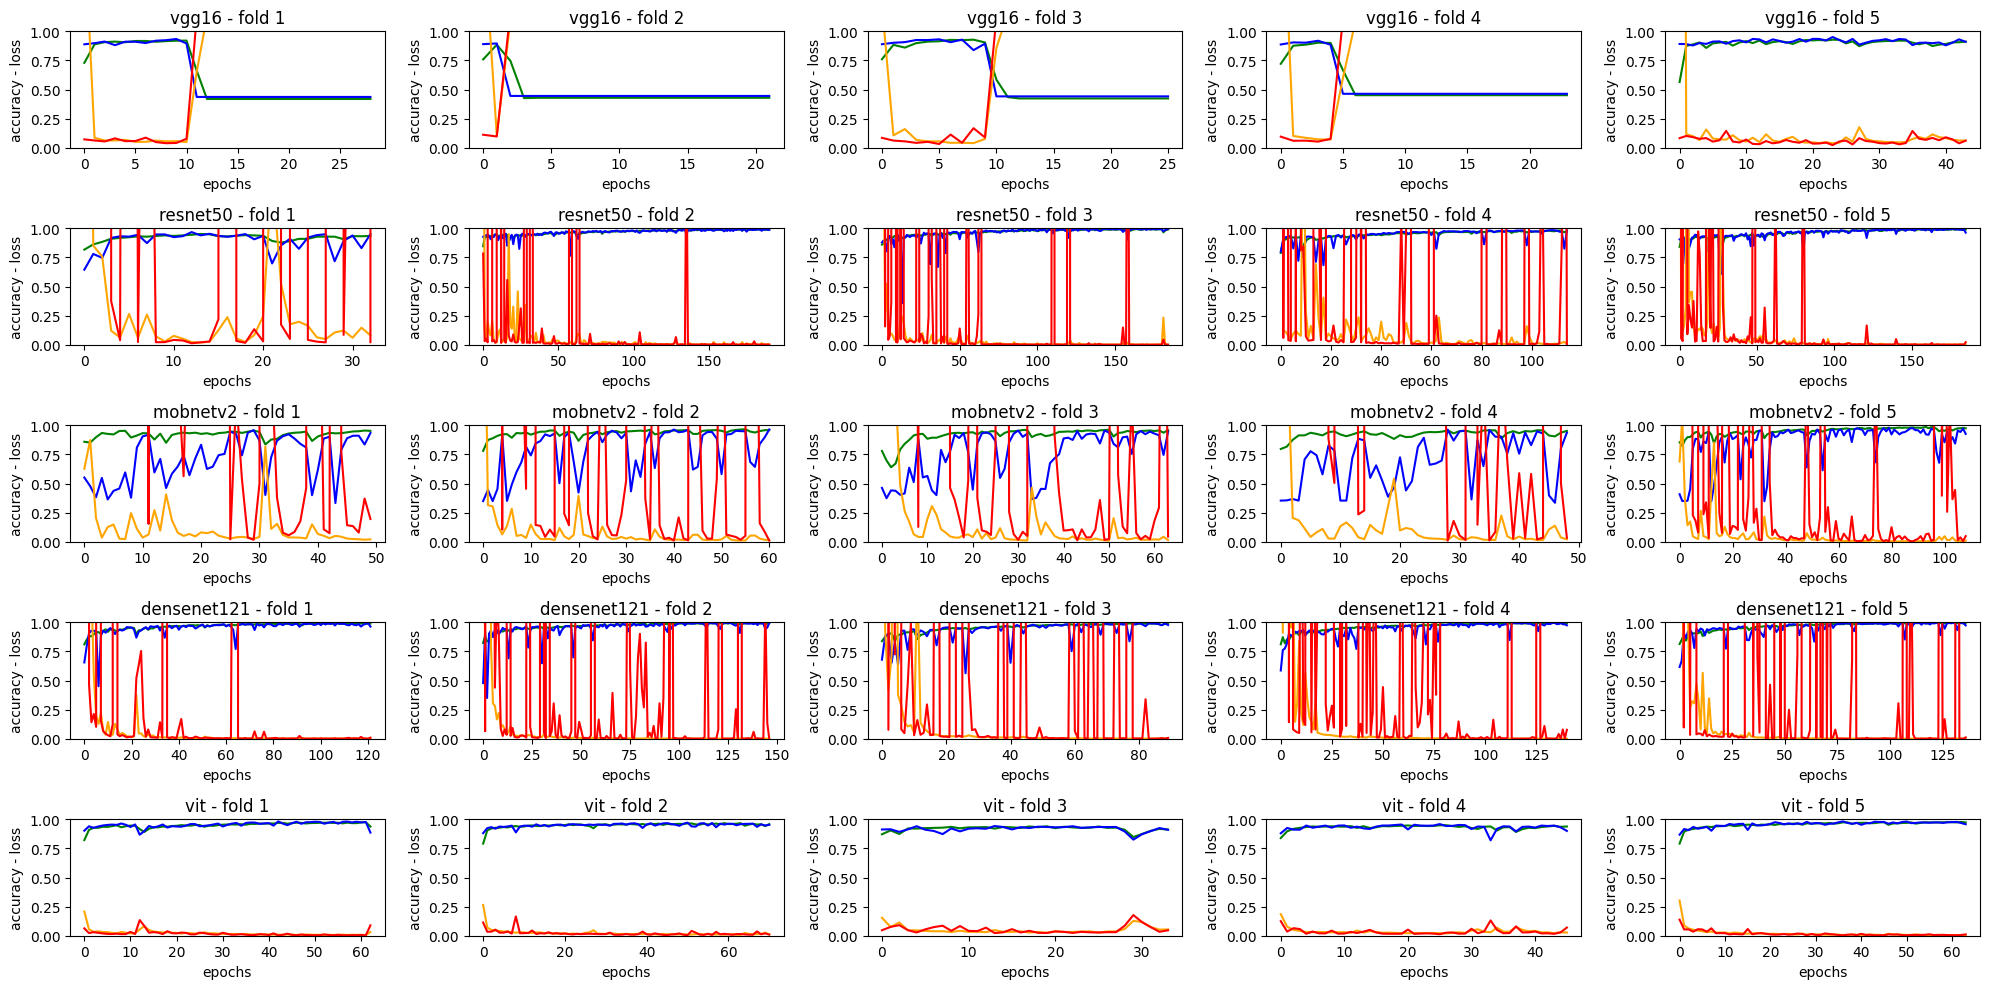

In [ ]:
models = ['vgg16', 'resnet50', 'mobnetv2', 'densenet121', 'vit']
folds = ['0', '1', '2', '3', '4']

import matplotlib.pyplot as plt
import numpy as np

# Setting the number of rows and columns for the subplots
rows = 5
cols = 5

# Creating the figure and axes objects for the subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 10))

# Looping through each subplot to add some content
for i, model in enumerate(models):
    for j, fold in enumerate(folds):
        # Generating some random data for each subplot
        training_process = [performance[model][fold]['training_process'][t] for t in range(4)]
        colors = ['orange', 'green', 'red', 'blue']
        for t in [1, 3, 0, 2]:
          color = colors[t]
          data = training_process[t]
          if t in [0, 2]:
            data = np.power(data, 2)
          axs[i, j].plot(data, color=color)
        axs[i, j].set_ylim(0, 1)
        # axs[i, j].legend(['train_acc', 'vall_acc', 'train_loss', 'val_loss'])
        axs[i, j].set_title(model+' - fold '+str(int(fold)+1))
        axs[i, j].set_xlabel('epochs')
        axs[i, j].set_ylabel('accuracy - loss')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Showing the plot
plt.savefig(plot_dir+'training_process.svg', transparent=True, dpi=1200)
plt.show()



[[0.86057269 0.91709521 0.88095043 0.91749432]
 [0.91588909 0.94495716 0.92823994 0.94942389]
 [0.89882007 0.94737568 0.91882446 0.94113113]
 [0.9243464  0.94076551 0.93093215 0.95012171]
 [0.90427491 0.92714801 0.91373858 0.94439305]]


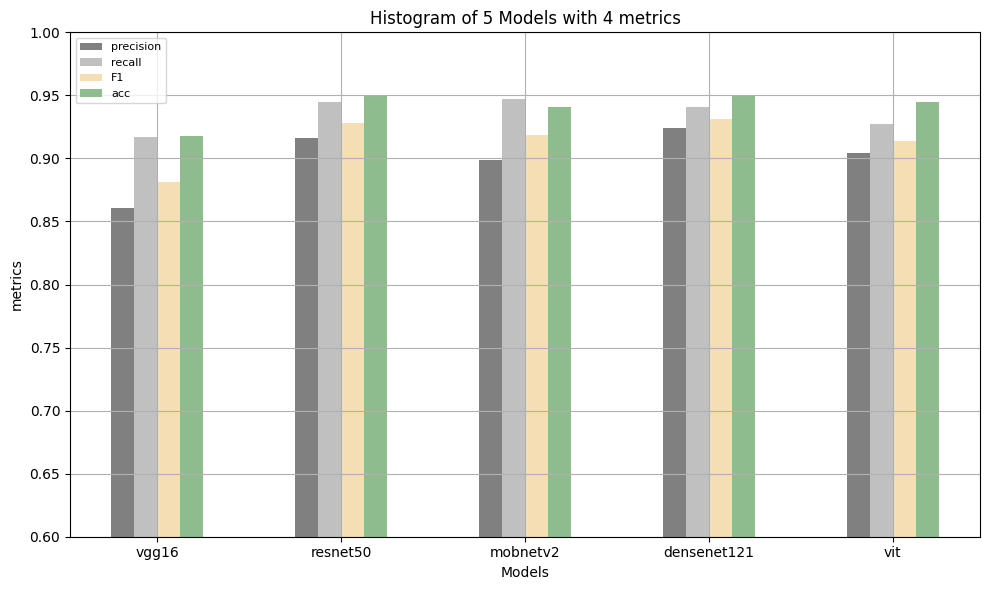

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Sample data: 5 models, each with 4 modes
# For simplicity, using random data. Replace with your actual data.
models = ['vgg16', 'resnet50', 'mobnetv2', 'densenet121', 'vit']
folds = ['0', '1', '2', '3', '4']

results = []
for model in models:
  prec, rec, f1, acc = [], [], [], []
  for fold in folds:
    prec.append(np.mean(performance[model][fold]['p_r_f'][0]))
    rec.append(np.mean(performance[model][fold]['p_r_f'][1]))
    f1.append(np.mean(performance[model][fold]['p_r_f'][2]))
    acc.append(performance[model][fold]['acc'])
  idx = np.argmax(f1)
  p_r_f_acc = [np.mean(prec), np.mean(rec), np.mean(f1), np.mean(acc)]
  results.append(p_r_f_acc)
results = np.array(results)
print(results)
# Model names
models = ['vgg16', 'resnet50', 'mobnetv2', 'densenet121', 'vit']

# Mode names
metrics = ['precision', 'recall', 'F1', 'acc']

# Number of models
n_models = len(models)

# Width of the bars
bar_width = 0.125

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each mode
colors = ['grey', 'silver', 'wheat', 'darkseagreen']
for i in range(len(metrics)):
    ax.bar(np.arange(n_models) + i * bar_width, results[:, i], width=bar_width, label=metrics[i], color=colors[i])

# Set the position of the x ticks
ax.set_xticks(np.arange(n_models) + bar_width * 1.5)
ax.set_xticklabels(models)
ax.set_ylim(0.6, 1)
plt.grid()

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('metrics')
plt.title('Histogram of 5 Models with 4 metrics')

# Adding legend
plt.legend(loc='upper left', fontsize=8)

# Show plot
plt.tight_layout()
#plt.savefig(plot_dir+'p_r_f_acc.svg', transparent=True, dpi=1200)
plt.show()


In [ ]:
models = ['vgg16', 'resnet50', 'mobnetv2', 'densenet121', 'vit']
folds = ['0', '1', '2', '3', '4']

results = []
for model in models:
  prec, rec, f1, acc = [], [], [], []
  print('\n\n', model, '='*50)
  for fold in folds:
    print(int(fold)+1, '-'*20)
    prec.append(np.round(np.mean(performance[model][fold]['p_r_f'][0]), 3))
    rec.append(np.round(np.mean(performance[model][fold]['p_r_f'][1]), 3))
    f1.append(np.round(np.mean(performance[model][fold]['p_r_f'][2]), 3))
    acc.append(np.round(performance[model][fold]['acc'], 3))
    print(prec[-1], rec[-1], f1[-1])
  print('average', np.round(np.mean(prec), 3), np.round(np.mean(rec), 3), np.round(np.mean(f1), 3), np.round(np.mean(acc), 3))



 vgg16 ==================================================
1 --------------------
0.785 0.867 0.814
2 --------------------
0.803 0.907 0.835
3 --------------------
0.885 0.932 0.906
4 --------------------
0.888 0.954 0.917
5 --------------------
0.942 0.926 0.934
average 0.861 0.917 0.881 0.917


 resnet50 ==================================================
1 --------------------
0.871 0.922 0.894
2 --------------------
0.898 0.954 0.92
3 --------------------
0.9 0.915 0.907
4 --------------------
0.933 0.968 0.949
5 --------------------
0.978 0.965 0.971
average 0.916 0.945 0.928 0.949


 mobnetv2 ==================================================
1 --------------------
0.83 0.92 0.865
2 --------------------
0.871 0.943 0.902
3 --------------------
0.896 0.959 0.923
4 --------------------
0.924 0.953 0.937
5 --------------------
0.973 0.962 0.967
average 0.899 0.947 0.919 0.941


 densenet121 ==================================================
1 --------------------
0.871 0.919 0.893
2

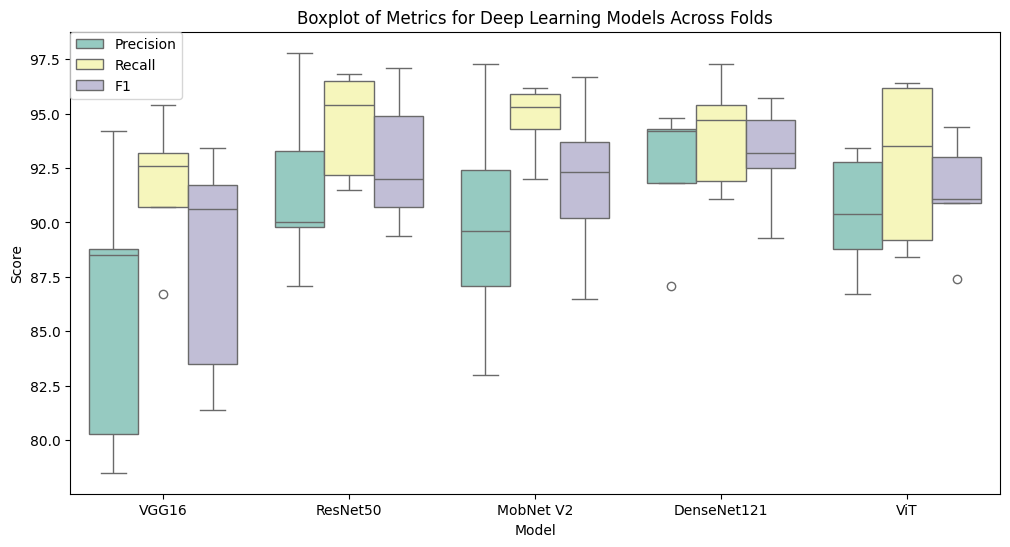

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Manually transcribed data from the image
data = {
    'Model': ['VGG16', 'ResNet50', 'MobNet V2', 'DenseNet121', 'ViT',
              'VGG16', 'ResNet50', 'MobNet V2', 'DenseNet121', 'ViT',
              'VGG16', 'ResNet50', 'MobNet V2', 'DenseNet121', 'ViT',
              'VGG16', 'ResNet50', 'MobNet V2', 'DenseNet121', 'ViT',
              'VGG16', 'ResNet50', 'MobNet V2', 'DenseNet121', 'ViT'],
    'Fold': ['Fold 1'] * 5 + ['Fold 2'] * 5 + ['Fold 3'] * 5 + ['Fold 4'] * 5 + ['Fold 5'] * 5,
    'Precision': [78.5, 87.1, 83.0, 87.1, 88.8,
                  80.3, 89.8, 87.1, 91.8, 86.7,
                  88.5, 90, 89.6, 94.8, 90.4,
                  88.8, 93.3, 92.4, 94.3, 92.8,
                  94.2, 97.8, 97.3, 94.2, 93.4],
    'Recall': [86.7, 92.2, 92.0, 91.9, 93.5,
               90.7, 95.4, 94.3, 95.4, 88.4,
               93.2, 91.5, 95.9, 94.7, 96.4,
               95.4, 96.8, 95.3, 97.3, 96.2,
               92.6, 96.5, 96.2, 91.1, 89.2],
    'F1': [81.4, 89.4, 86.5, 89.3, 90.9,
           83.5, 92, 90.2, 93.2, 87.4,
           90.6, 90.7, 92.3, 94.7, 93.0,
           91.7, 94.9, 93.7, 95.7, 94.4,
           93.4, 97.1, 96.7, 92.5, 91.1]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to have a suitable format for seaborn's boxplot
df_melted = df.melt(id_vars=['Model', 'Fold'], var_name='Metric', value_name='Score')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with seaborn
sns.boxplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="Set3")

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], loc=2, borderaxespad=0.)

plt.title('Boxplot of Metrics for Deep Learning Models Across Folds')
#plt.savefig(code_dir+'boxplot.svg', dpi=1200, transparent=True)
plt.show()
